In [1]:
# Import basic libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,  export_graphviz
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.externals import joblib 

In [3]:
# Read data file using Pandas  
df1=pd.read_csv('winequality_red.csv')
#df1=pd.read_csv('winequality_red.csv')

In [4]:
df1.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [5]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
print(df1.shape)

(1599, 12)


In [7]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [8]:
# using isnull() function for finding null values   
print(df1.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


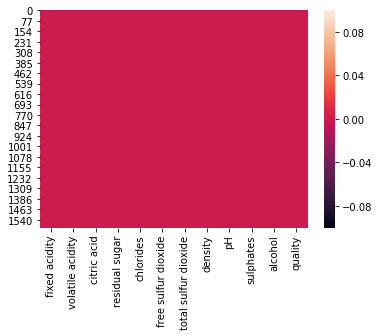

In [9]:
# Visual Representation for finding null values using Heat Map
sns.heatmap(df1.isnull())
plt.show()

In [10]:
print(df1.describe(include='all'))

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [11]:
print(df1.nunique())

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64


In [12]:
c_count=df1['quality'].value_counts()
print(c_count)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

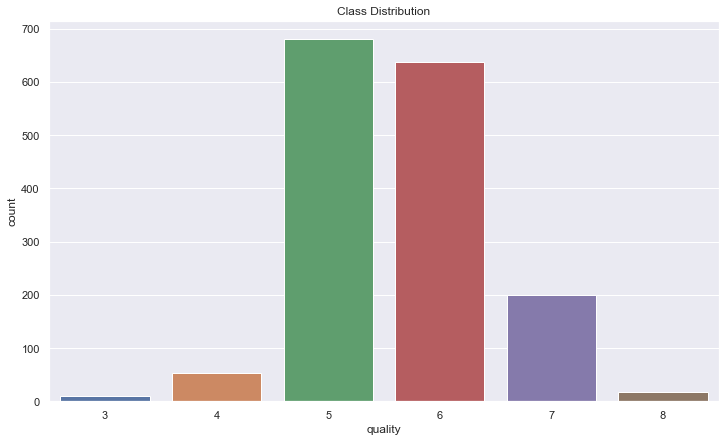

In [13]:
# Visual Representation of the dependent variable distribution in the dataset
sns.set(rc={'figure.figsize':(12,7)})
quality_c=df1['quality']
df1_count=sns.countplot(x=quality_c, data=df1)
plt.title("Class Distribution")

<Figure size 2160x2160 with 0 Axes>

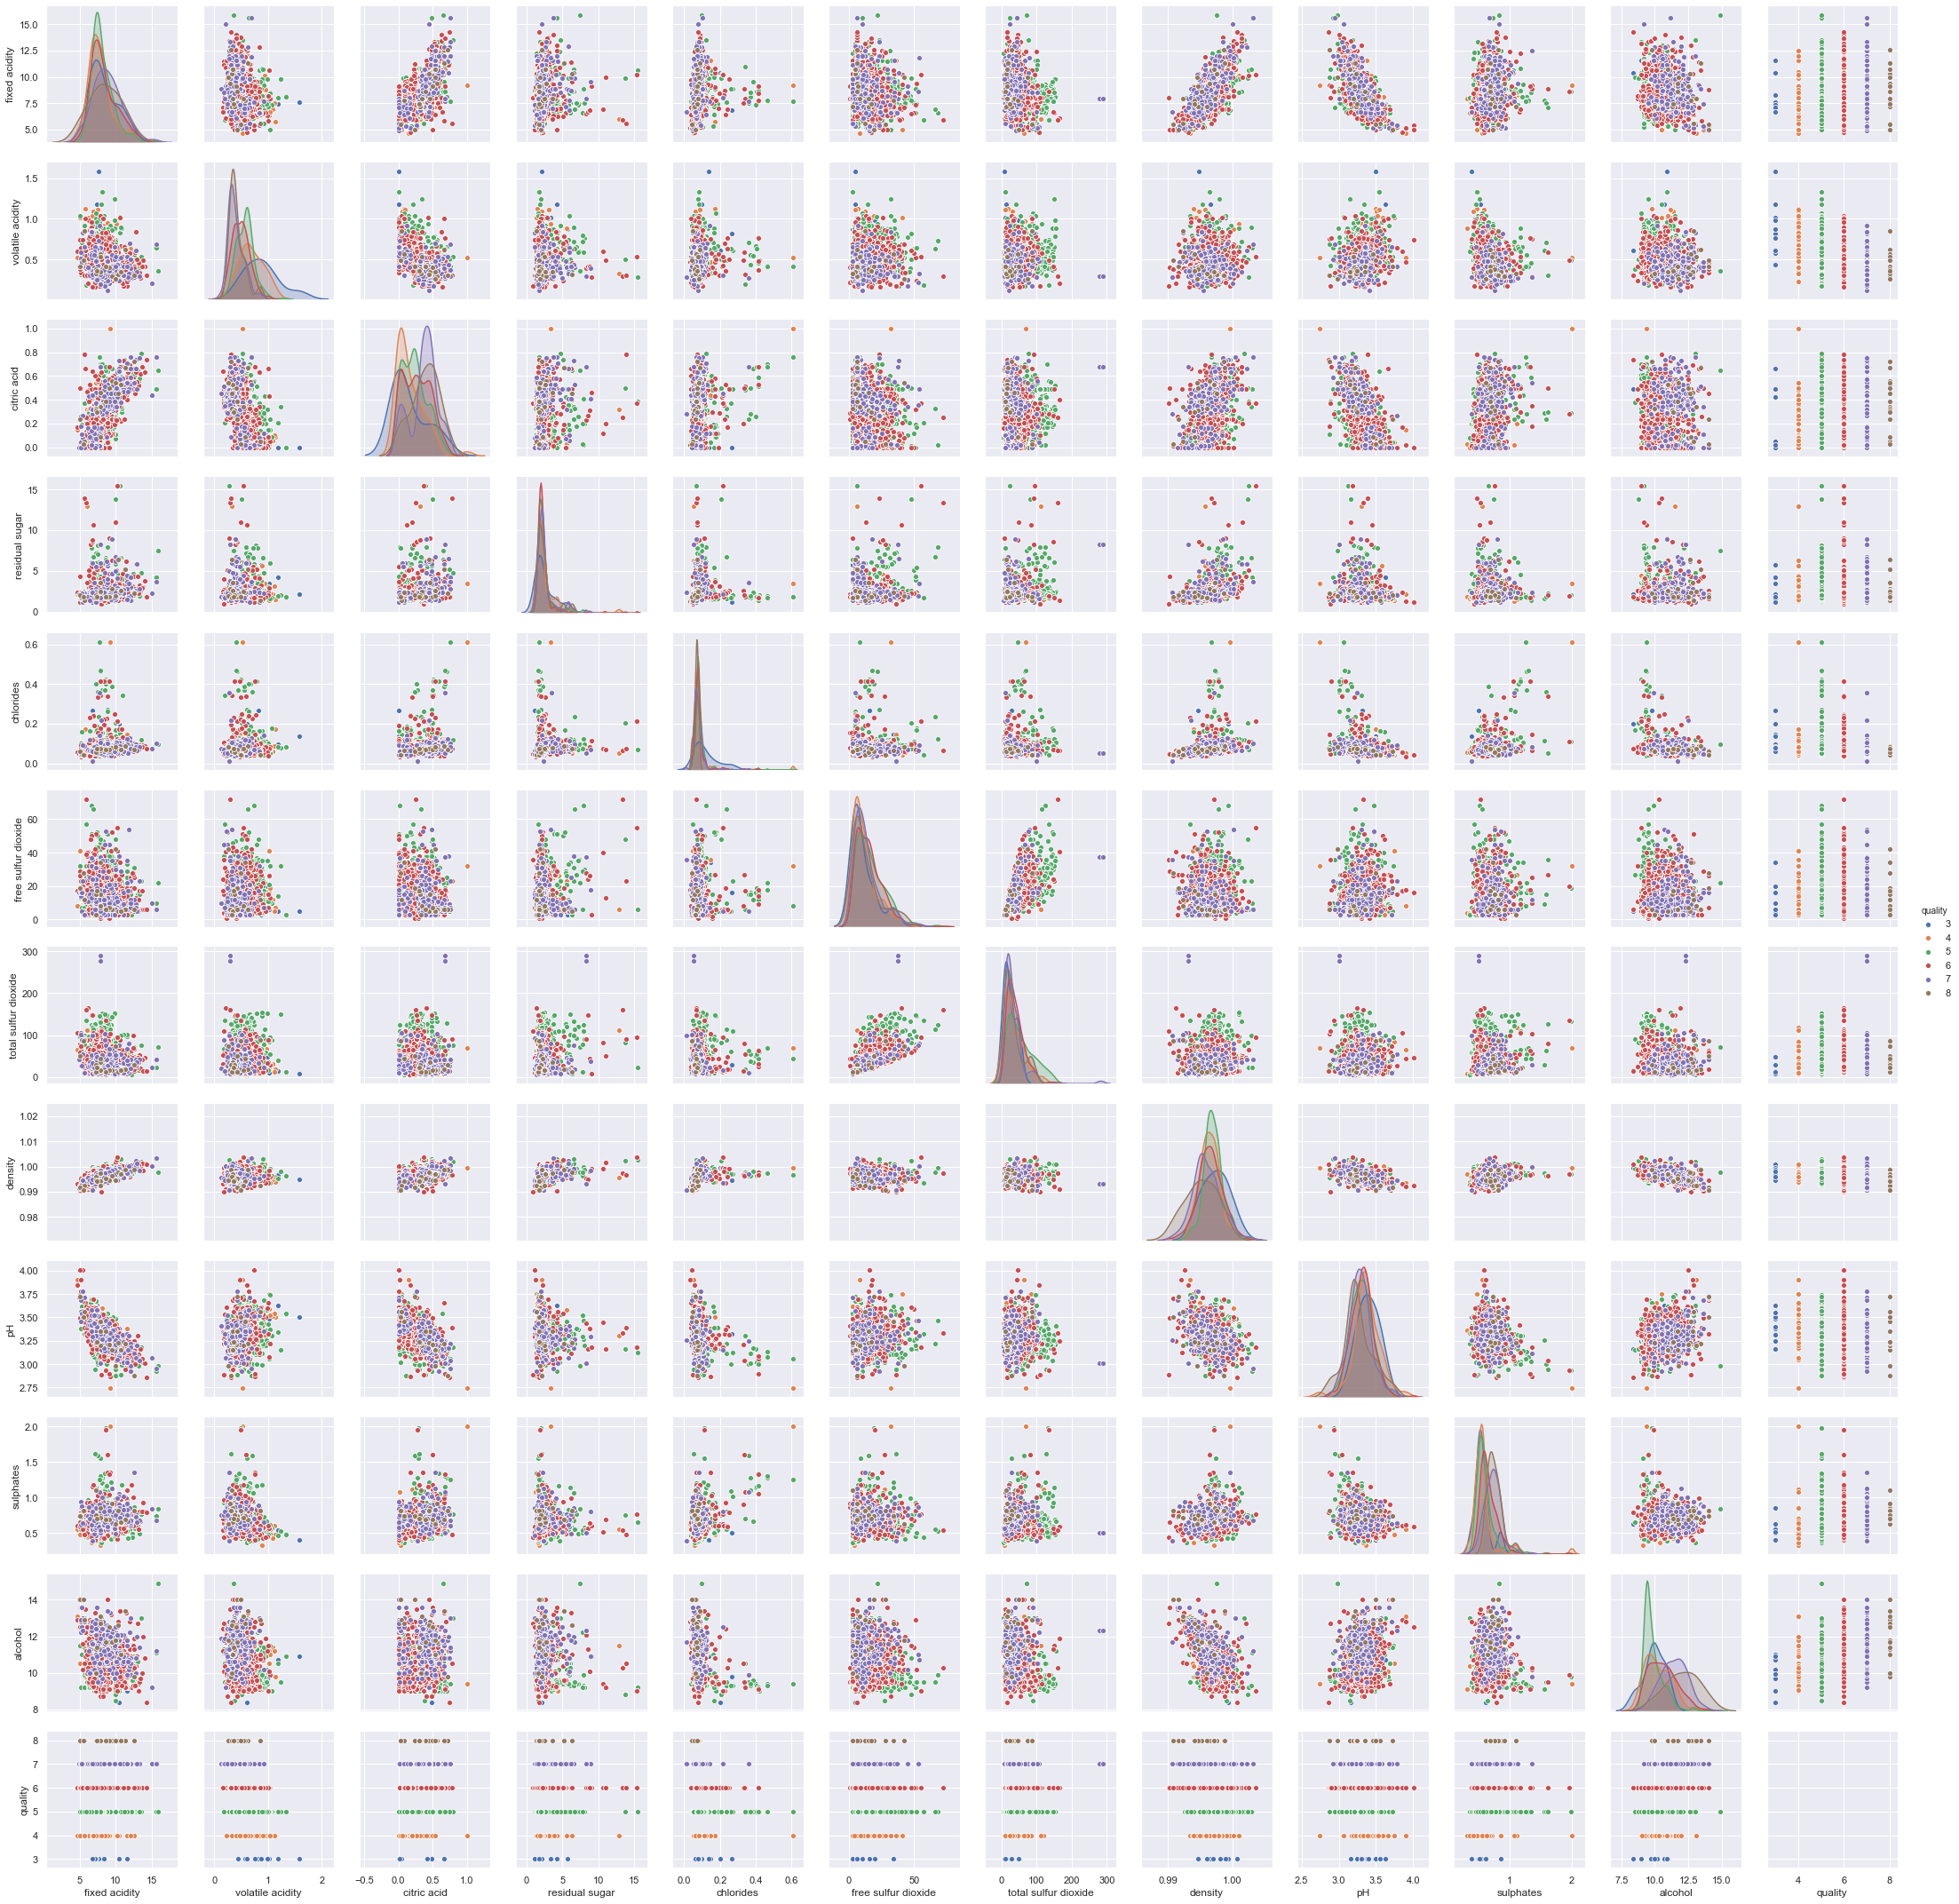

<Figure size 2160x2160 with 0 Axes>

In [14]:
sns.pairplot(df1, hue="quality")
plt.figure(figsize=(30, 30))

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

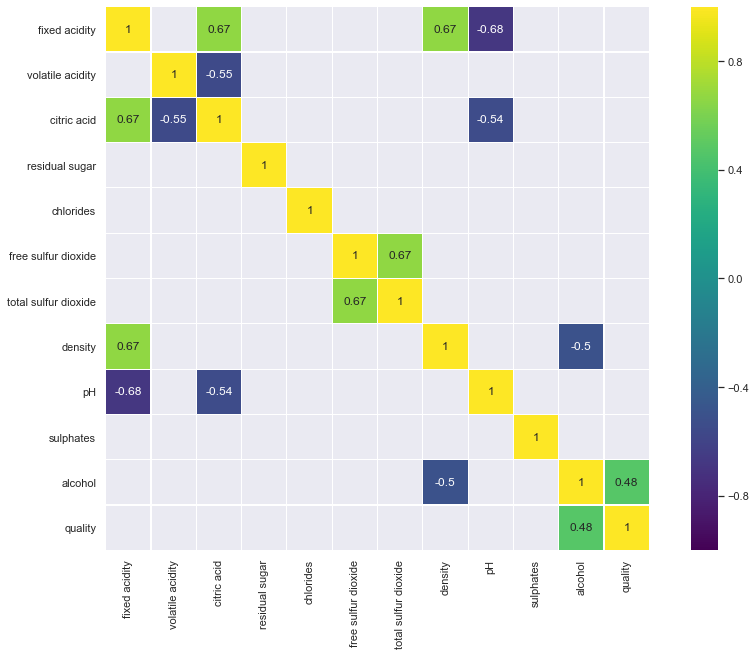

In [15]:
# Analysis the correlation in the dataset
corr = df1.corr()
print(corr)

plt.figure(figsize=(15, 10))

sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot=True, annot_kws={"size": 12}, square=True)

In [16]:
n_wines = df1.shape[0]

# Number of wines with quality rating above 6 considered good quality
quality_above_6 = df1.loc[(df1['quality'] > 6)]
n_above_6 = quality_above_6.shape[0]

# Number of wines with quality rating below 5 considered not appropiate quality (Bad)
quality_below_5 = df1.loc[(df1['quality'] < 5)]
n_below_5 = quality_below_5.shape[0]

# Number of wines with quality rating between 5 to 6 considered average quality 
quality_between_5 = df1.loc[(df1['quality'] >= 5) & (df1['quality'] <= 6)]
n_between_5 = quality_between_5.shape[0]

# Percentage of wines with quality rating above 6
greater_percent = n_above_6*100/n_wines

# Print the results
print("Total number of wine data: {}".format(n_wines))
print("Wines with rating 7 and above: {}".format(n_above_6))
print("Wines with rating less than 5: {}".format(n_below_5))
print("Wines with rating 5 and 6: {}".format(n_between_5))
print("Percentage of wines with quality 7 and above: {:.2f}%".format(greater_percent))


Total number of wine data: 1599
Wines with rating 7 and above: 217
Wines with rating less than 5: 63
Wines with rating 5 and 6: 1319
Percentage of wines with quality 7 and above: 13.57%


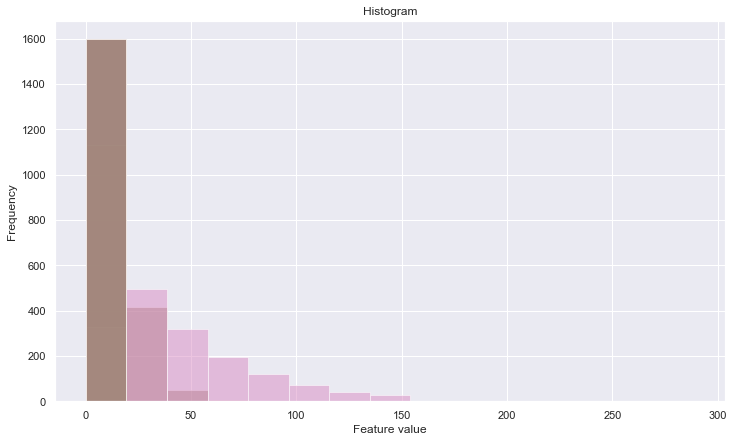

In [17]:
# Visualize the distribution of the data type in the feature space
df = pd.DataFrame(df1)
df.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

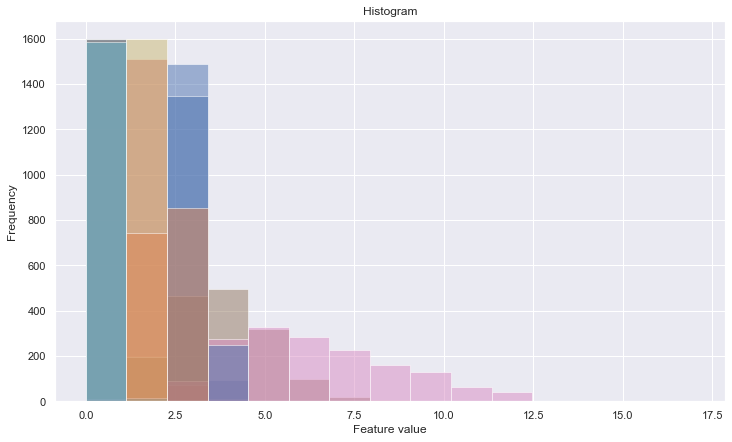

In [18]:
# Try eliminating skewness uisng squareroot function 
df_pow = df1.apply(np.sqrt)
df_pow.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

In [19]:
#Define quality into three target classes 
def isQuality(quality):
    if quality > 6:
        return 1
    if (quality >= 5) and (quality <= 6):
        return 2
    else:
        return 0

In [20]:
df1['isQuality'] = df1['quality'].apply(isQuality)
print('New Classes are defined for the quality of wines:\n',df['isQuality'].value_counts())

New Classes are defined for the quality of wines:
 2    1319
1     217
0      63
Name: isQuality, dtype: int64


In [21]:
# Numerical representation of the skweness in the feature set
df2=df1.drop('quality', axis=1)
print(df.skew())
df2.head()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
isQuality              -2.294434
dtype: float64


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  isQuality  
0      9.4          2  
1      9.8          2  
2      9.8          2  
3      9.8          2  
4      9.4          2

In [22]:
# Signmoid Function established to deal with skewness
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y

In [23]:
for col in df2.columns:
    if df2.skew().loc[col]>0.55:
        df2[col]=sigmoid(df2[col])

In [24]:
df2.skew()

fixed acidity           -3.878466
volatile acidity         0.455592
citric acid              0.318337
residual sugar           0.044673
chlorides                5.580297
free sulfur dioxide    -12.346422
total sulfur dioxide   -17.136252
density                  0.071288
pH                       0.193683
sulphates                1.702149
alcohol                 -0.731595
isQuality               -2.294434
dtype: float64

In [25]:
# Seprate Data into features and target set
feature_data=df2
target_class=df1['isQuality']
print(feature_data.shape)
print(target_class.shape)

(1599, 12)
(1599,)


In [26]:
# Standardize the feature_space values 
sc = StandardScaler()
feature_data_std = sc.fit_transform(feature_data)

In [27]:
# Reshape the target variable 
target_class=df1['isQuality'].values.reshape(-1,1)
print(target_class.shape)

(1599, 1)


In [28]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(feature_data_std, target_class, random_state = 83,test_size=0.28)
[subset.shape for subset in [x_train,y_test,x_train,y_test]]

[(1151, 12), (448, 1), (1151, 12), (448, 1)]

In [29]:
# Create function for three classifiers to find best parameters to train and test the model. 
def grid_search(estimator, clf, x_train, x_test, y_train, y_test):
    if estimator == 'SVM':
        # Support Vector Machine
        svc_params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                      'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
        grid_svc = GridSearchCV(SVC(), svc_params)
        grid_svc.fit(x_train, y_train)
        # SVC best estimator
        svc = grid_svc.best_estimator_
        print("Best Parameters for SVM: ", grid_svc.best_estimator_)
        print("Best Score for SVM: ", grid_svc.best_score_)
        print("******************************************")
        return svc
    elif estimator == 'DecisionTree':
    
        # Decision Tree
        dtree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,30,1)),"min_samples_leaf": list(range(5,20,1))}
        grid_dtree = GridSearchCV(DecisionTreeClassifier(), dtree_params)
        grid_dtree.fit(x_train, y_train)
        # tree best estimator
        tree_clf = grid_dtree.best_estimator_
        print("Best Parameters for Decision Tree: ", grid_dtree.best_estimator_)
        print("Best Score for Decision Tree: ", grid_dtree.best_score_)
        print("******************************************")
        return tree_clf

In [30]:
#Define classification function
def apply_classification(estimator, clf, x_train, x_test, y_train, y_test):
    #Find the best parameter by grid search
    grid_clf = grid_search(estimator, clf, x_train, x_test, y_train, y_test)
    
    # 0.28% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=10, test_size=0.28, random_state=83)
    
    scores = cross_val_score(grid_clf, x_train, y_train, cv=10)
    print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
    print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
    print("==============================================")
    
    #Predict the test data as selected classifier
    clf_prediction = grid_clf.predict(x_test)
    _accuracy = sum(y_test == clf_prediction)/len(y_test)
    print("Accuracy of",estimator,":",_accuracy*100)
    
    #print confusion matrix and accuracy score before best parameters
    _conf_matrix = confusion_matrix(y_test, clf_prediction)
    print("Confusion matrix of",estimator,":\n", _conf_matrix)
    print("==========================================")
    
    print("Classification Report: \n {}".format (classification_report(y_test, clf_prediction)))
    return grid_clf

In [31]:
svm = SVC()
apply_classification('SVM', svm, x_train, x_test, y_train, y_test)

Best Parameters for SVM:  SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Best Score for SVM:  1.0
******************************************
Mean Accuracy of Cross Validation: % 100.0
Std of Accuracy of Cross Validation: % 0.0
Accuracy of SVM : [14.50892857 81.69642857 14.50892857 81.69642857 81.69642857 81.69642857
 81.69642857 81.69642857 81.69642857 81.69642857 81.69642857 81.69642857
 14.50892857 81.69642857 81.69642857 81.69642857 81.69642857 81.69642857
 81.69642857 14.50892857 81.69642857 81.69642857 81.69642857 81.69642857
 14.50892857 81.69642857 81.69642857 81.69642857 81.69642857 81.69642857
 81.69642857  3.79464286  3.79464286 81.69642857 81.69642857 81.69642857
 81.69642857 81.69642857 81.69642857 81.69642857 81.69642857 81.69642857
 81.69642857 81.69642857 81.69642857 81.696428

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
dt = DecisionTreeClassifier()
dt_classifier = apply_classification('DecisionTree', dt, x_train, x_test, y_train, y_test)

Best Parameters for Decision Tree:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Best Score for Decision Tree:  1.0
******************************************
Mean Accuracy of Cross Validation: % 100.0
Std of Accuracy of Cross Validation: % 0.0
Accuracy of DecisionTree : [14.50892857 81.69642857 14.50892857 81.69642857 81.69642857 81.69642857
 81.69642857 81.69642857 81.69642857 81.69642857 81.69642857 81.69642857
 14.50892857 81.69642857 81.69642857 81.69642857 81.69642857 81.69642857
 81.69642857 14.50892857 81.69642857 81.69642857 81.69642857 81.69642857
 14.50892857 81.69642857 81.69642857 81.69642857 81.69642857 81.69642857
 81.69

In [33]:
# Lastly Save the model for futher use
joblib.dump(dt_classifier, 'wine_quality.pkl')

['wine_quality.pkl']